In [50]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

## Dataset 1

In [51]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.to_numpy()

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [52]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [53]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.to_numpy(), axis=0)
Day = np.concatenate(Day.to_numpy(), axis=0)
bkp_start_time = np.concatenate(bkp_start_time.to_numpy(), axis=0)
workflow_ID = np.concatenate(workflow_ID.to_numpy(), axis=0)
File_name = np.concatenate(File_name.to_numpy(), axis=0)
bkp_size = np.concatenate(bkp_size.to_numpy(), axis=0)
bkp_time = np.concatenate(bkp_time.to_numpy(), axis=0)


In [54]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [55]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

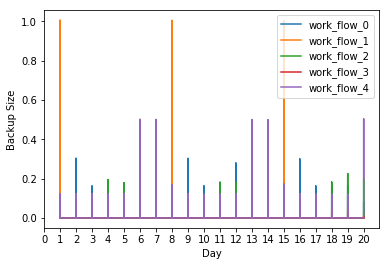

In [56]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])
plt.plot(day_idx[:twenty_days+1], w_0)
plt.plot(day_idx[:twenty_days+1],w_1)
plt.plot(day_idx[:twenty_days+1],w_2)
plt.plot(day_idx[:twenty_days+1],w_3)
plt.plot(day_idx[:twenty_days+1],w_4)
plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])

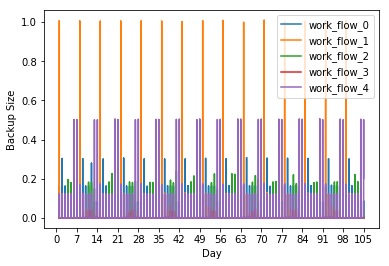

In [57]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.zeros(total_idx)
w_1 = np.zeros(total_idx)
w_2 = np.zeros(total_idx)
w_3 = np.zeros(total_idx)
w_4 = np.zeros(total_idx)
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.plot(day_idx, w_0)
plt.plot(day_idx, w_1)
plt.plot(day_idx, w_2)
plt.plot(day_idx, w_3)
plt.plot(day_idx, w_4)
plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])

## Scalar Encoding

In [58]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [63]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [66]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10372394307764717
RMSE Testing for fold 0 = 0.10239583686063236
RMSE Training for fold 1 = 0.1040102677696096
RMSE Testing for fold 1 = 0.09974838949664054
RMSE Training for fold 2 = 0.1034056737036714
RMSE Testing for fold 2 = 0.10524280402528839
RMSE Training for fold 3 = 0.10326198560406356
RMSE Testing for fold 3 = 0.10650623485065111
RMSE Training for fold 4 = 0.10468398655218429
RMSE Testing for fold 4 = 0.09319293912923975
RMSE Training for fold 5 = 0.10166644908553063
RMSE Testing for fold 5 = 0.11957597330164838
RMSE Training for fold 6 = 0.1044392401329294
RMSE Testing for fold 6 = 0.09565151810120212
RMSE Training for fold 7 = 0.10292991063395468
RMSE Testing for fold 7 = 0.10936393399553014
RMSE Training for fold 8 = 0.10334388535695424
RMSE Testing for fold 8 = 0.10578955588773904
RMSE Training for fold 9 = 0.10437561284437008
RMSE Testing for fold 9 = 0.09624219995338498


In [67]:
print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))

Average RMSE Training = 0.10358409547609151
Average RMSE Testing = 0.10337093856019568


#### Scatter Plots

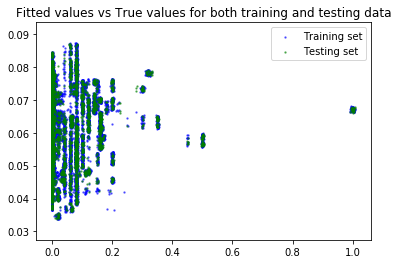

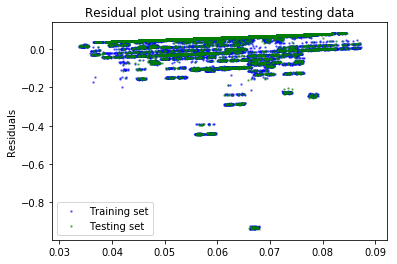

In [68]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## Random Forest